## GW Ground Detectors
(from https://arxiv.org/pdf/1902.09485.pdf)

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from ipywidgets import interact


def _get_elements(a):
    i_finite = np.isfinite(a)
    a_finite = a[np.where(np.prod(i_finite, axis=-1)), :][0].T
    return a_finite[:, np.argsort(a_finite[0])]


class GWGround:

    def __init__(self, data_path='../data/gw/gw-ground-data.csv'):
        self.all_data = np.genfromtxt('../data/gw/gw-ground-data.csv',
                                      delimiter=',')
        self.ce_data = _get_elements(self.all_data[:, 0:2])
        self.et_data = _get_elements(self.all_data[:, 2:4])
        self.voyager_data = _get_elements(self.all_data[: ,4:6])
        self.aligo_data = _get_elements(self.all_data[:, 6:8])
        self.ce_interp = interp1d(*self.ce_data, kind='cubic',
                                  bounds_error=False, assume_sorted=True)
        self.et_interp = interp1d(*self.et_data, kind='cubic',
                                  bounds_error=False, assume_sorted=True)
        self.voyager_interp = interp1d(*self.voyager_data, kind='cubic',
                                       bounds_error=False, assume_sorted=True)
        self.aligo_interp = interp1d(*self.aligo_data, kind='cubic',
                                     bounds_error=False, assume_sorted=True)


gw_ground = GWGround()

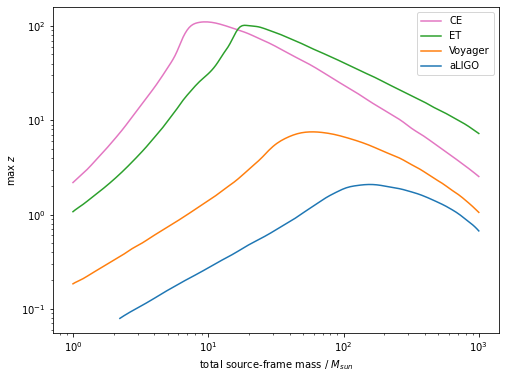

In [2]:
%matplotlib inline

x_plot = np.logspace(0, 3, 200)
ce_plot = gw_ground.ce_interp(x_plot)
et_plot = gw_ground.et_interp(x_plot)
voyager_plot = gw_ground.voyager_interp(x_plot)
aligo_plot = gw_ground.aligo_interp(x_plot)

plt.figure(figsize=(8, 6))
plt.plot(x_plot, ce_plot, label='CE', c='tab:pink')
plt.plot(x_plot, et_plot, label='ET', c='tab:green')
plt.plot(x_plot, voyager_plot, label='Voyager', c='tab:orange')
plt.plot(x_plot, aligo_plot, label='aLIGO', c='tab:blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('total source-frame mass / $M_{sun}$')
plt.ylabel('max $z$')
plt.legend()
plt.show()

In [3]:
@interact(logM=(0, 3, 0.05))
def plot_3d(logM):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')

    # CE
    z_ce = gw_ground.ce_interp(10**logM)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = z_ce * np.cos(u)*np.sin(v)
    y = z_ce * np.sin(u)*np.sin(v)
    z = z_ce * np.cos(v)
    ax.plot_wireframe(x, y, z, color='tab:pink', alpha=0.5, label='CE')

    # ET
    z_et = gw_ground.et_interp(10**logM)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = z_et * np.cos(u)*np.sin(v)
    y = z_et * np.sin(u)*np.sin(v)
    z = z_et * np.cos(v)
    ax.plot_wireframe(x, y, z, color='tab:green', alpha=0.5, label='ET')

    # Voyager
    z_voyager = gw_ground.voyager_interp(10**logM)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = z_voyager * np.cos(u)*np.sin(v)
    y = z_voyager * np.sin(u)*np.sin(v)
    z = z_voyager * np.cos(v)
    ax.plot_wireframe(x, y, z, color='tab:orange', alpha=0.5, label='Voyager')

    # aLIGO
    z_aligo = gw_ground.aligo_interp(10**logM)
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = z_aligo * np.cos(u)*np.sin(v)
    y = z_aligo * np.sin(u)*np.sin(v)
    z = z_aligo * np.cos(v)
    ax.plot_wireframe(x, y, z, color='tab:blue', alpha=0.5, label='aLIGO')

    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='logM', max=3.0, step=0.05), Output()), _dom_classes=…